# Etivity 1: Exploratory Data Analysis (EDA)

## Student Name: Pieter Johannes Alberts (Johann)
## Student ID: 22179046

## A. Questions to be Investigated

The dataset relates to direct marketing campaigns of a Portuguese banking institution which was actioned using phone calls. The following questions were selected as they were percieved to be of interest to the banking institution:

1. What were the top three and bottom three job types contacted that subscribed to the campaign? 
2. In which months were the highest subscription rates achieved?
3. Were contacts who subscribed to previous campaigns more likely to subscribe to the latest one?

In order to answer these questions, general Exploratory Data Analysis will be performed on the complete dataset before answering these more specific questions. This will not only provide an insight in the data in general, but might raise further questions which could be investigated if required.

## B. Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Read csv file with dataframe output 
df = pd.read_csv('./bank.csv')

In [3]:
# Ignore warnings from Seaborn
import warnings
warnings.filterwarnings('ignore')

## C. Quick Data Exploration

**Attribute Information:**

- age
- job: job type 
- marital: marital status
- education: level of education
- default: has credit in default?
- balance: average yearly balance, in euros
- housing: has housing loan?
- loan: has personal loan?
- contact: contact communication type
- day: last contact day of the month
- month: last contact month of year
- duration: last contact duration, in seconds
- campaign: number of contacts performed during this campaign and for this client
- pdays: number of days that passed by after the client was last contacted from a previous campaign
- previous: number of contacts performed before this campaign and for this client
- poutcome: outcome of the previous marketing campaign
- subscribed: has the client subscribed a term deposit?

> Attribute information was obtained from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

In [4]:
# Inspect first five rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [5]:
# Inspect last five rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [6]:
# Get some information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


The dataframe information shows that some values are missing. These will be investigated in more detail in the next section.

The column datatypes can also be observed, with numerical and categorical values listed below:

**Numerical**
- age (float64)
- balance (int64)
- day (int64)
- duration (int64)
- campaign (int64)
- pdays (int64)
- previous (int64)

**Categorical**
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome
- subscribed

Although no model will be trained using this data in this ntoebook, it's worth noting that some numerical columns (e.g. day) might need to be treated differently as bigger values may not need to be treated differently than smaller day values. 

### C.1 Check for missing values

In [7]:
missing_values_df = df.isnull().sum().rename('number_of_missing_values').reset_index()
missing_values_df.set_index('index', inplace=True)
missing_values_df['percent_of_missing_values'] = (df.isnull().sum()/df.shape[0]) * 100
missing_values_df.sort_values('number_of_missing_values', ascending=False, inplace=True)

In [8]:
missing_values_df

number_of_missing_values  percent_of_missing_values
index                                                          
poutcome                         454                      22.70
contact                          191                       9.55
education                        104                       5.20
age                               12                       0.60
job                               10                       0.50
default                            0                       0.00
balance                            0                       0.00
housing                            0                       0.00
loan                               0                       0.00
day                                0                       0.00
month                              0                       0.00
duration                           0                       0.00
campaign                           0                       0.00
pdays                              0                       0.00
previous                           0                       0.00
marital                            0                       0.00
subscribed                         0                       0.00

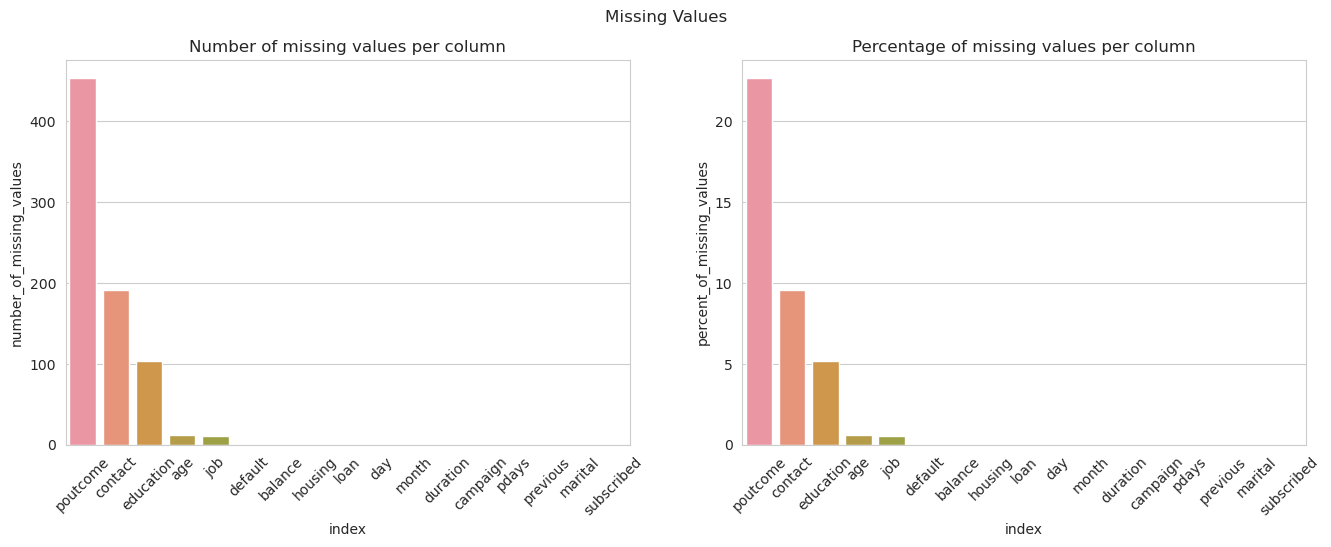

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
fig.suptitle('Missing Values')
missing_vals_bar_plot_1 = sns.barplot(x=missing_values_df.index, y=missing_values_df['number_of_missing_values'], ax=axs[0])
axs[0].set_xticklabels(missing_vals_bar_plot_1.get_xticklabels(), rotation=45)
axs[0].set_title('Number of missing values per column')
missing_vals_bar_plot_2 = sns.barplot(x=missing_values_df.index, y=missing_values_df['percent_of_missing_values'], ax=axs[1])
axs[1].set_xticklabels(missing_vals_bar_plot_2.get_xticklabels(), rotation=45)
axs[1].set_title('Percentage of missing values per column')
plt.show();

There are missing values for the following colums:

- poutcome
- contact
- education
- age
- job

The `poutcome` column has the most missing values. This might be due to these contact not having been contacted previously though the banking institution would need to clarify this if required. The next two colums with a relatively high number of missing values are `contact` and `education`. Why these values are missing could also be investigated to establish whether these values are missing completely at random (MCAR), missing at random (MAR) or not missing at random  (NMAR). This would be more relevant for the data preparation step which will be covered in the next etivity.

### C.2. Quick Examination of Numerical Attributes

In [10]:
# Get a description of numerical attributes for the dataset
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

Some interesting observations can be made based on the above description:

- 75% of contacts are below the `age` of 50
- 50% of contacts had an annual `balance` of 551 or lower 
- There is a massive difference between the maximum `balance` and the mean suggesting a skewed distribution
- The average `duration` of a call for this campaign is 292 seconds (just below five minutes)
- The average number of calls per contact for `previous` campaigns is 2.5 with a rather high of 55

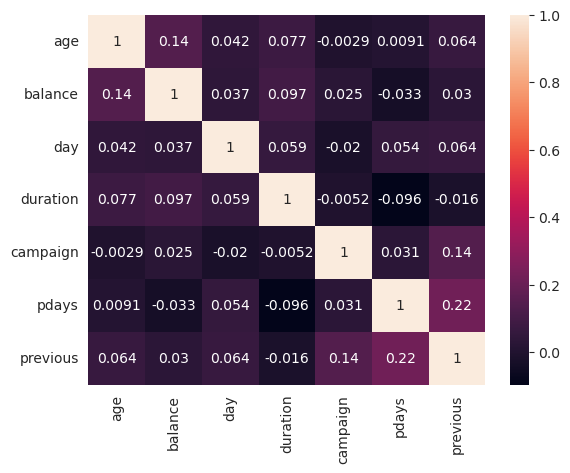

In [11]:
sns.heatmap(df.corr(), annot=True);

> Based on the heatmap of correlation for numerical features above, there does not appear to be any significant correlation between them.

In [12]:
# Isolate and display numerical feature names
numerical = df.select_dtypes(['int64', 'float64']).columns.values
print(numerical)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


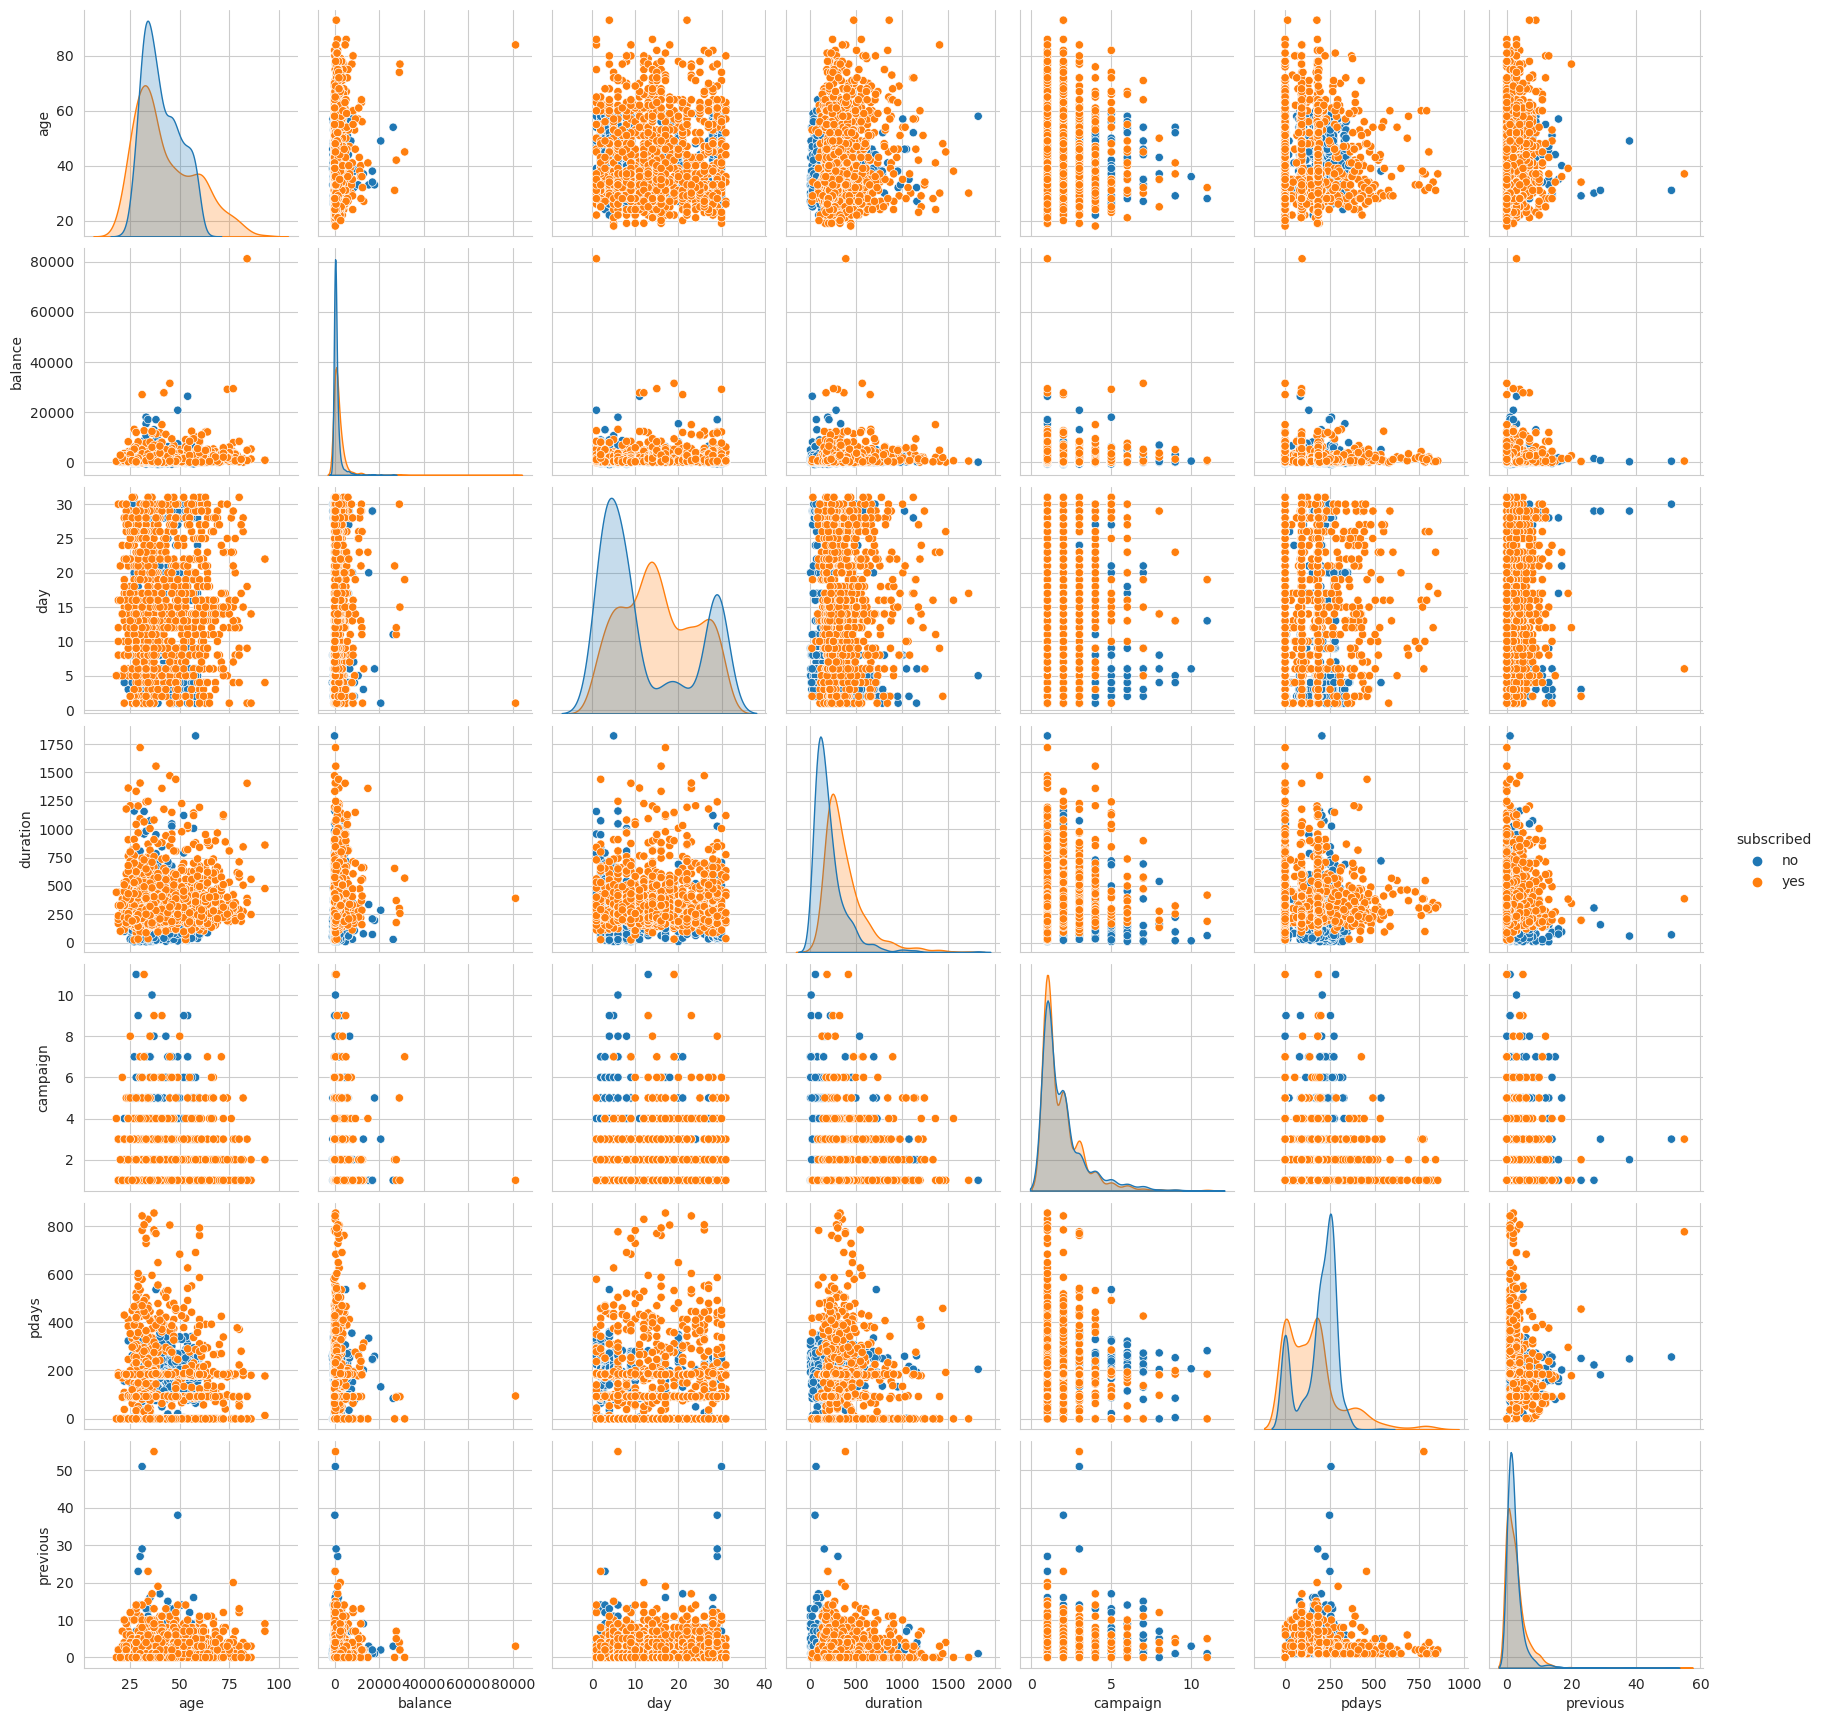

In [13]:
# Perform a pairplot of numerical values to allow visual
# inspection of possible correlation between numerical
# values
sns.pairplot(df,hue='subscribed')
plt.show()

> The pair plot seems to confirm what the correlation heatmap indicated in that non of the numerical attributes show strong correlation.

A more detailed analysis of numerical attributes is performed in section C.

### C.3. Quick Examination of Categorical Attributes

In [14]:
# Get a description of categorical (object) attributes
df.select_dtypes('object').describe()

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

> The description of categorical attributes is not as detailed as for numerical attributes which is expected. It show some interesting information on missing values (explored earlier). Furthermore, we can see the number of unique values per attribute as well as the top (most found) values per feature. Some interesting observations are listed below:

- The top `job` title for contacts is *management*
- The main outcome (`poutcome`) of previous campaigns is *failure*
- There is a 50/50 split for contacts that `subscribed` and those who didn't
- `default`, `housing`, `loan`, `contact` and `subscribed` all appear to have binary options

In [15]:
# Isolate and display categorical feature names
categorical = df.select_dtypes(['object']).columns.values
print(categorical)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'subscribed']


In [16]:
# Inspect uinique values and counts for job attribute
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [17]:
# Inspect uinique values and counts for marital attribute
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [18]:
# Inspect uinique values and counts for education attribute
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [19]:
# Inspect uinique values and counts for housing attribute
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [20]:
# Inspect uinique values and counts for loan attribute
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

While I'm aware that this is a sample of a larger dataset and as such not necessarily reflective of the original larger dataset, the numbers above show some interesting information:

- The most represented `job` contacted is *manager*. Whether they were targeted more for this campaign is unknown
- Most contacts are *married*, with a status of *divorced* being the lowest
- Most contacts have a *secondary* level of education with *primary* being the lowest
- The number of contacts having and not having a housing loan is rougly equal
- The majority of contacted individuals didn't have a loan at the time of running the campaign

Categorical features will be explored in more detail in section E.

## D. Distribution Analysis for Numerical Attributes

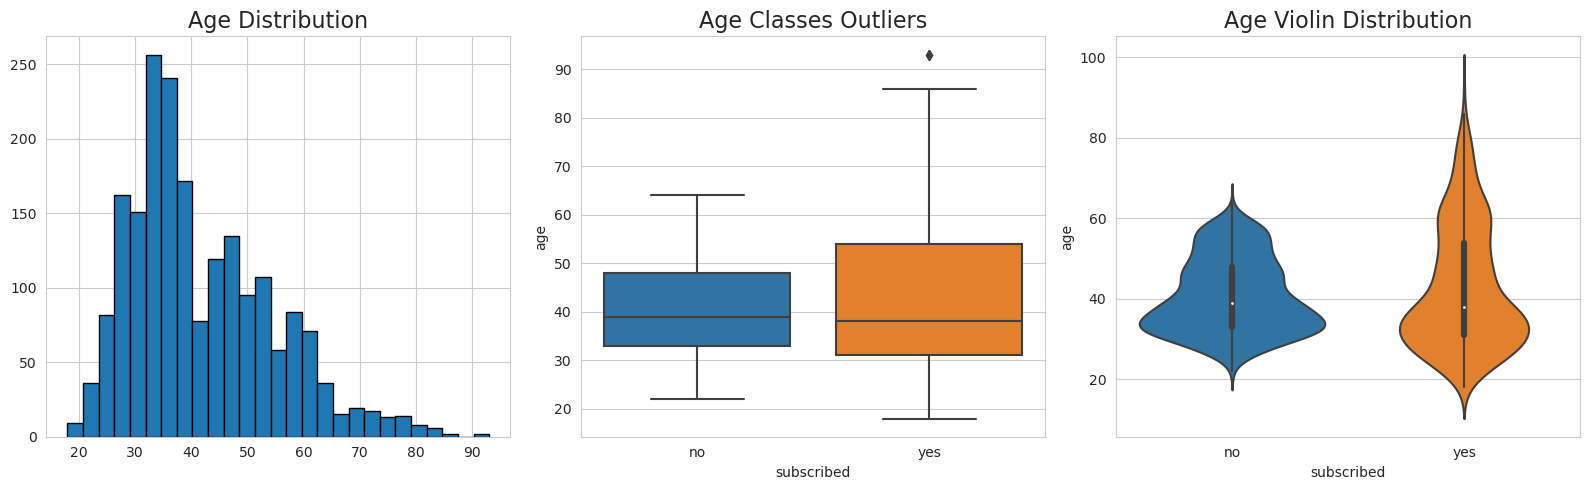

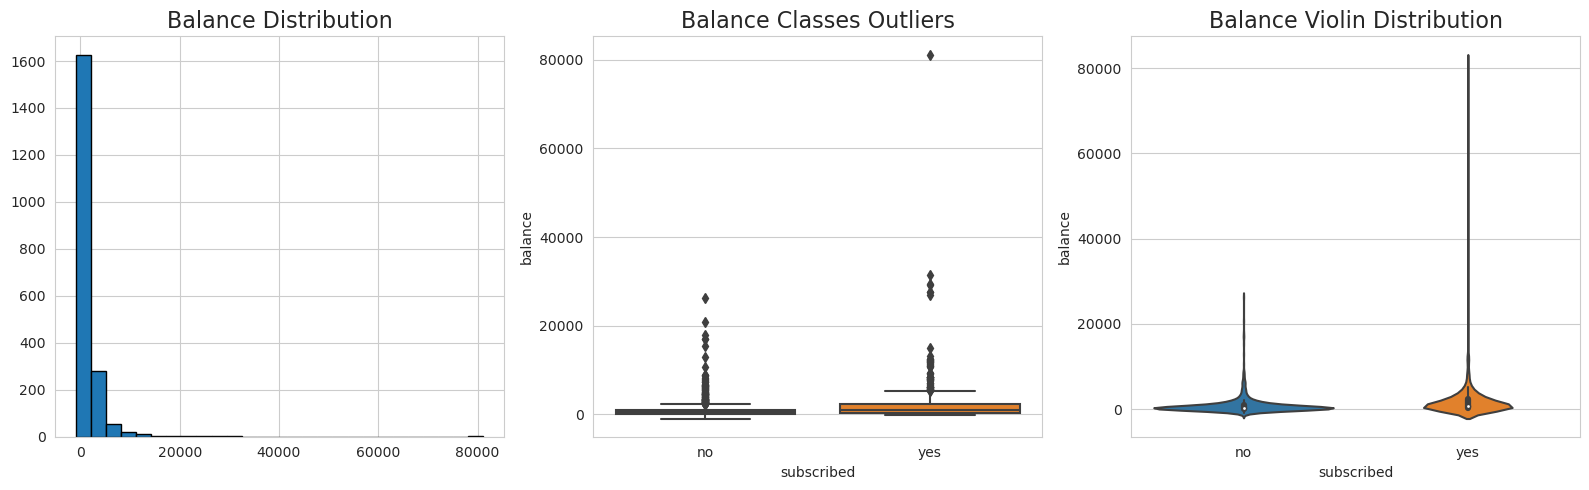

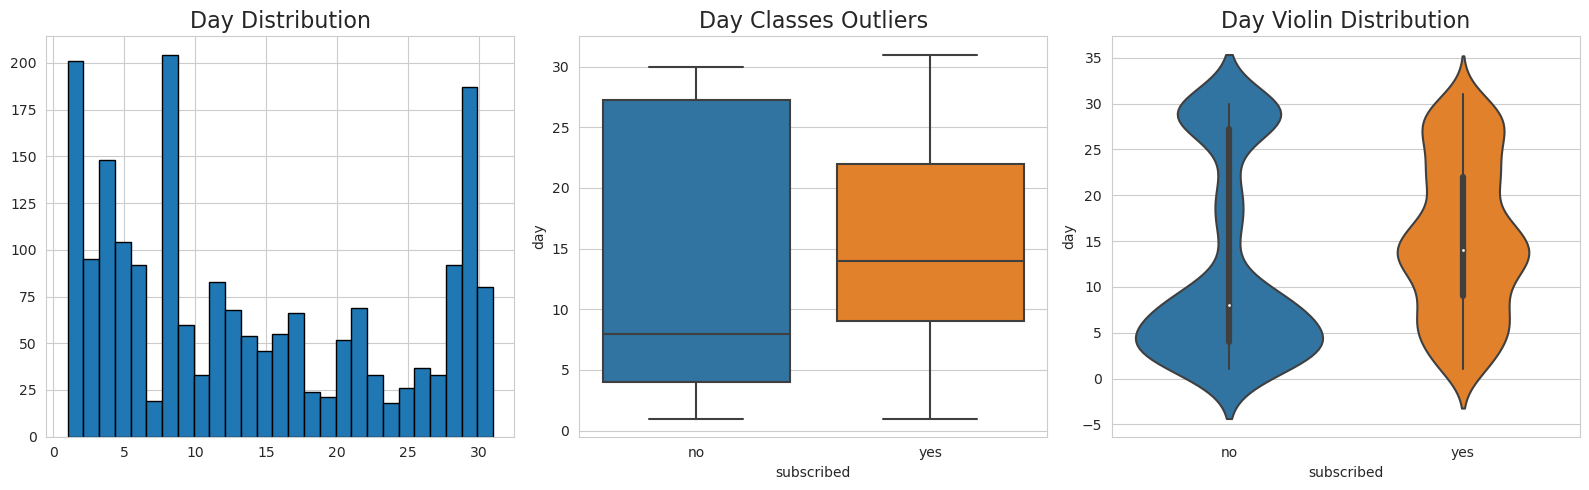

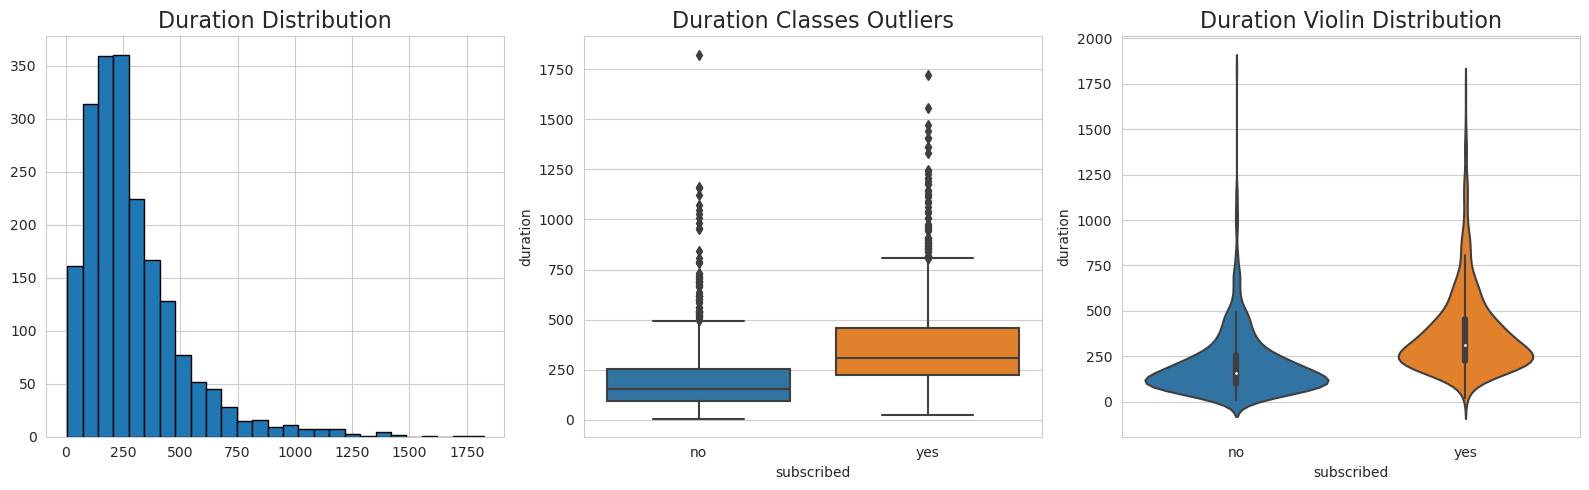

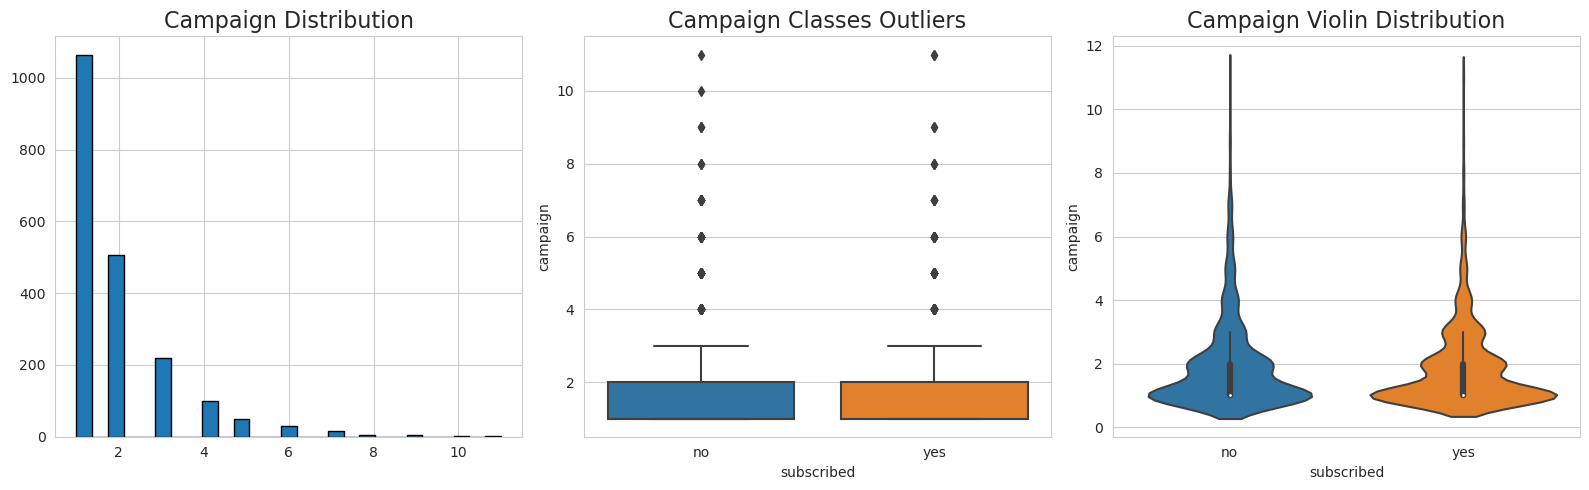

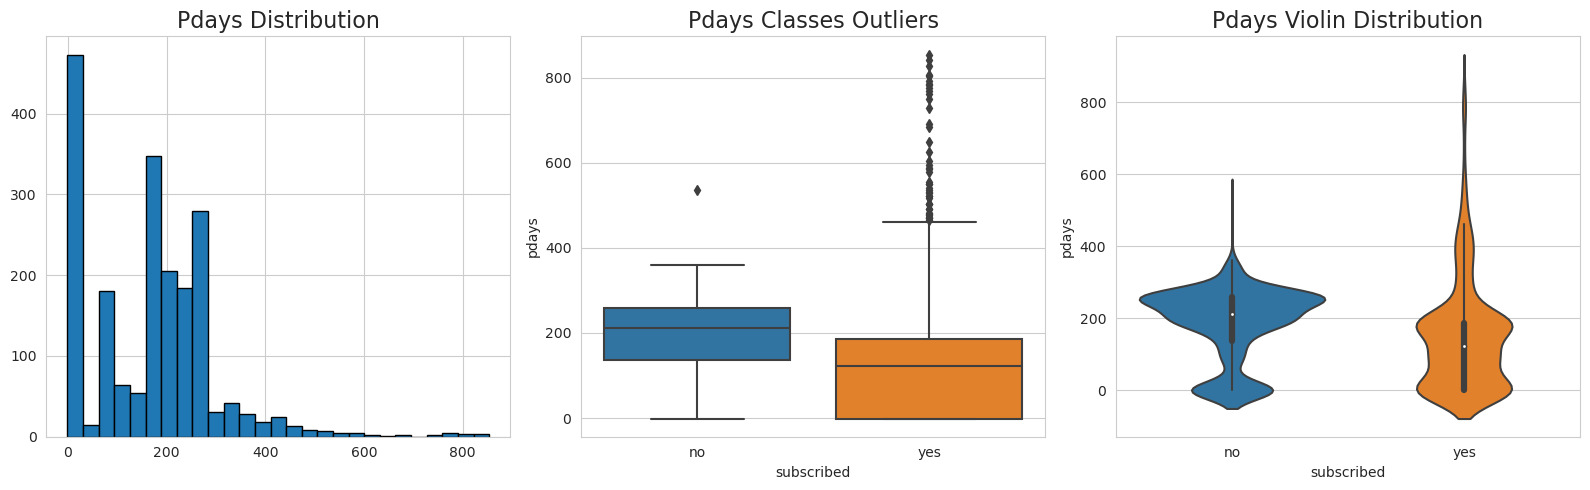

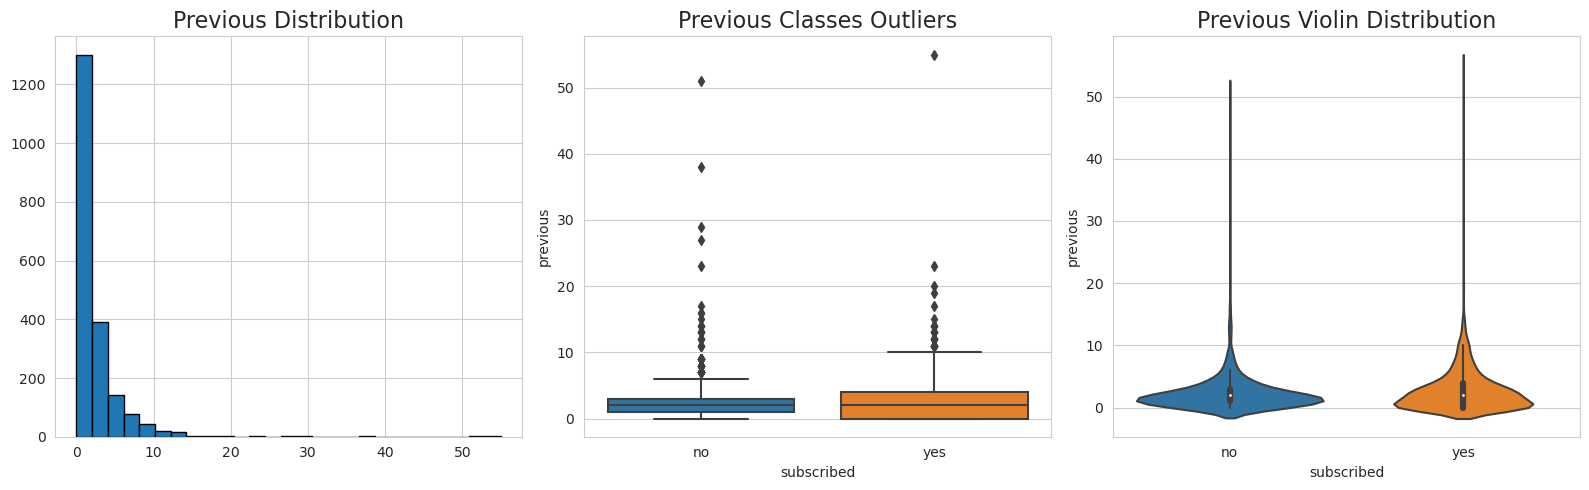

In [21]:
for feature in numerical:
    # Create subplots to plot two plots per row
    fig, axs =  plt.subplots(nrows=1, ncols=3, figsize = (16,5))
    
    # histogram
    axs[0].hist(df[feature], bins=27, edgecolor='black')#color = '#292929')
    axs[0].set_title(feature.title() + ' Distribution', fontsize=16)
    
    # boxplot
    sns.boxplot(data=df, y=feature, x='subscribed', ax=axs[1])
    axs[1].set_title(feature.title() + ' Classes Outliers', fontsize=16)
    
    # violinplot
    sns.violinplot(data=df, y=feature, x='subscribed', split=True, ax=axs[2])
    axs[2].set_title(feature.title() + ' Violin Distribution', fontsize=16)
    
    plt.tight_layout()
    plt.show()

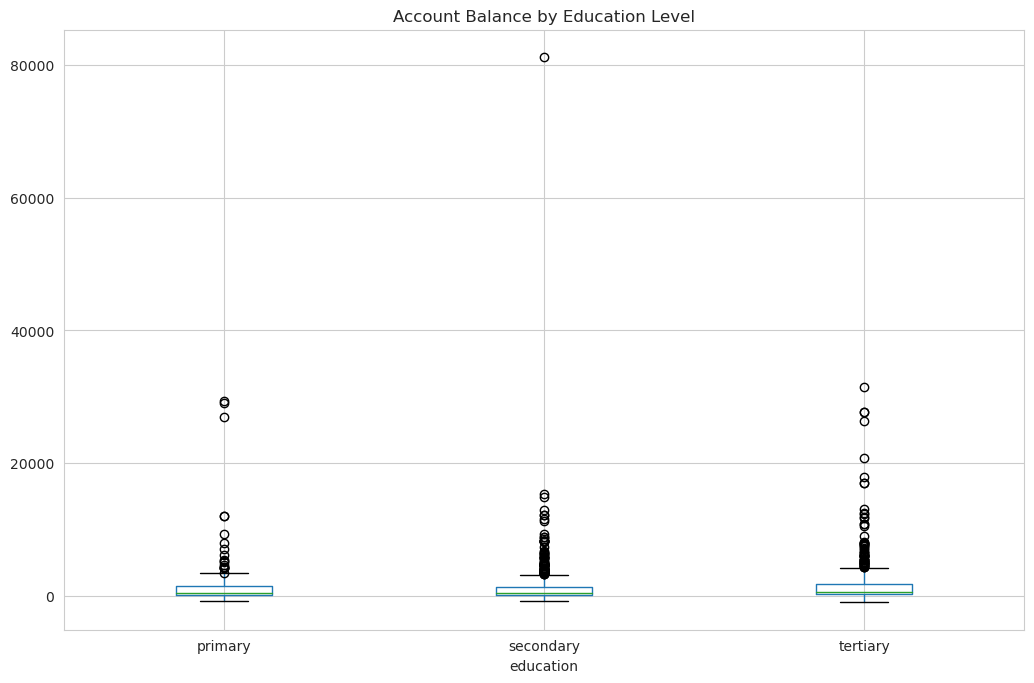

In [22]:
# Boxplots of Account balance, grouped by education
df.boxplot(column='balance', by='education', figsize=(12,8))
plt.suptitle(None)
plt.title('Account Balance by Education Level')
plt.show()

The account balance outlier at >80000 compresses the remaining data and make a more focused visualisation more difficult. As such, it will be removed and the original dataset and one with the outlier removed will be plotted side-by-side for comparrison.

In [23]:
# Create dataframe with maximum balance outlier removed
# to see a more focused plot of the remaining values
max_balance_row = df[df['balance'] == df['balance'].max()]
max_balance_dropped_df = df.drop(max_balance_row.index)

Text(0.5, 1.0, 'Account Balance by Education Level (Maximum Account Outlier Removed)')

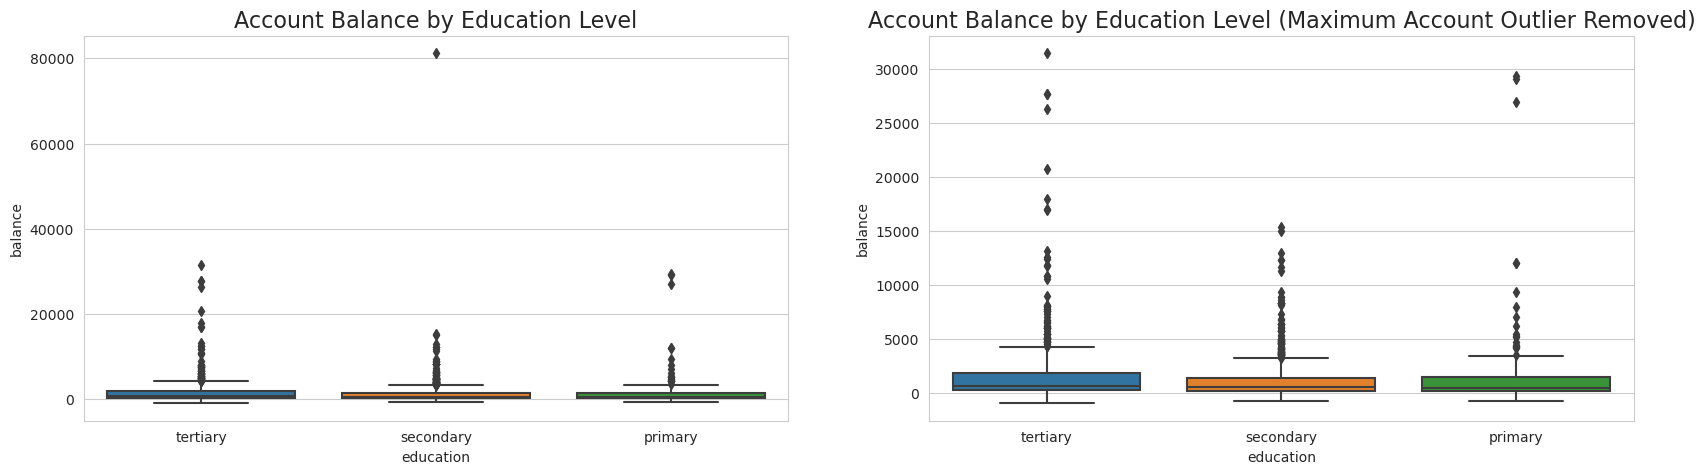

In [24]:
# Create subplots to plot two plots per row
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (20,5))
sns.boxplot(data=df, y='balance', x='education', ax=axs[0])
axs[0].set_title('Account Balance by Education Level', fontsize=16)
sns.boxplot(data=max_balance_dropped_df, y='balance', x='education', ax=axs[1])
axs[1].set_title('Account Balance by Education Level (Maximum Account Outlier Removed)', fontsize=16)

Text(0.5, 1.0, 'Account Balance by Marital Status (Maximum Account Outlier Removed)')

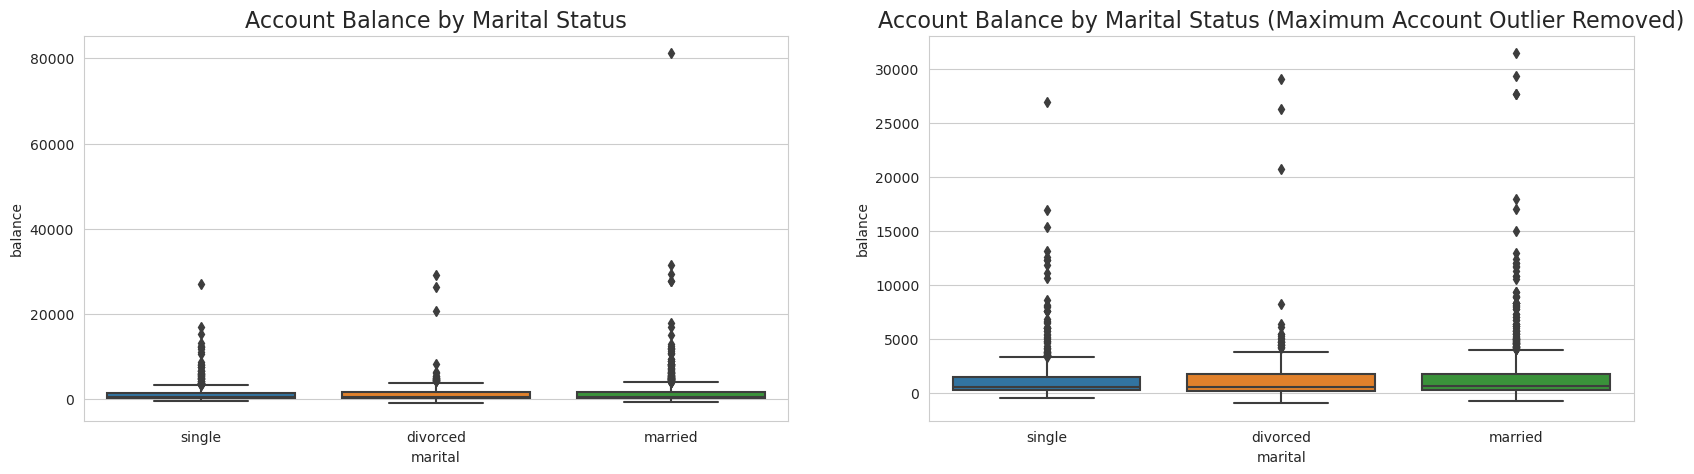

In [25]:
# Create subplots to plot two plots per row
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (20,5))
sns.boxplot(data=df, y='balance', x='marital', ax=axs[0])
axs[0].set_title('Account Balance by Marital Status', fontsize=16)
sns.boxplot(data=max_balance_dropped_df, y='balance', x='marital', ax=axs[1])
axs[1].set_title('Account Balance by Marital Status (Maximum Account Outlier Removed)', fontsize=16)

Text(0.5, 1.0, 'Account Balance by Previous Calls (Maximum Account Outlier Removed)')

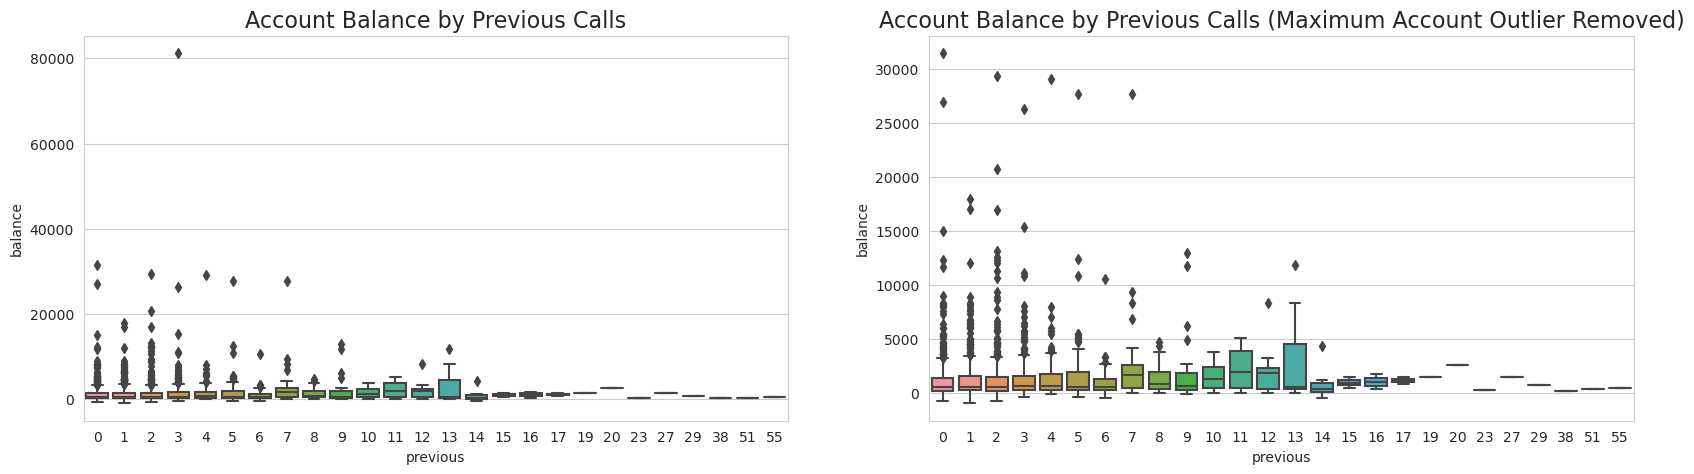

In [26]:
# Create subplots to plot two plots per row
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (20,5))
sns.boxplot(data=df, y='balance', x='previous', ax=axs[0])
axs[0].set_title('Account Balance by Previous Calls', fontsize=16)
sns.boxplot(data=max_balance_dropped_df, y='balance', x='previous', ax=axs[1])
axs[1].set_title('Account Balance by Previous Calls (Maximum Account Outlier Removed)', fontsize=16)

**age**

- The histogram shows a distribution skewed to the left with most of the contacts being in the lower age bracket
- It also appears that more contacts in the age group 30 to 55 subscribed than for those in the same age group that didn't

**balance**

- The distribution is again skewed to the left (even more so than `age`) with the majority of contacts having less than ~3000 with an outlier at ~80,000
- It appears that contacts with a slightly wider range of `balance` value subscribed to the campaign than those who didn't
- It appears that contacts were lower account balances were contacted more times before the current campaign than those with higher balances

**day**

- Interestingly, the distribution shows that individuals were contacted more on four specific days of the month
- About 50% of the contacts that subscribed were contacted between the 10th and 23rd of the month

**duration**

- The distribution for call duration is skewed to the left with most calls being between ~125 and ~500 seconds
- About 50% of contacts who subscribed to the campaign had a call duration of between ~250 and ~500 seconds

**campaign**

- Most contacts had one call for the current campaign
- The maximum number of calls to a contact for the current campaign is 11 with 50% of the contacts receiving one or two calls

**pdays**

- It appears that most contacts were contacted within ~250 days of being contacted for the previous campaign
- About 50% of contacts that were contacted up to ~200 days after the previous campaign contact subscribed to the current campaign

**previous**

- The distribution is skewed to the left with most contact having been contacted fewer than five times before the current campain
- About 50% of those that subscribed were contacted five times or fewer before the current campaign
- Some outliers show that certain individuals had been contacted 50 times or more before the current campaign. These might be long-standing clients, but further investigation would be needed to confirm this

## E. Analysis for Categorical Attributes

### E.1 Plotting Categorical Attributes

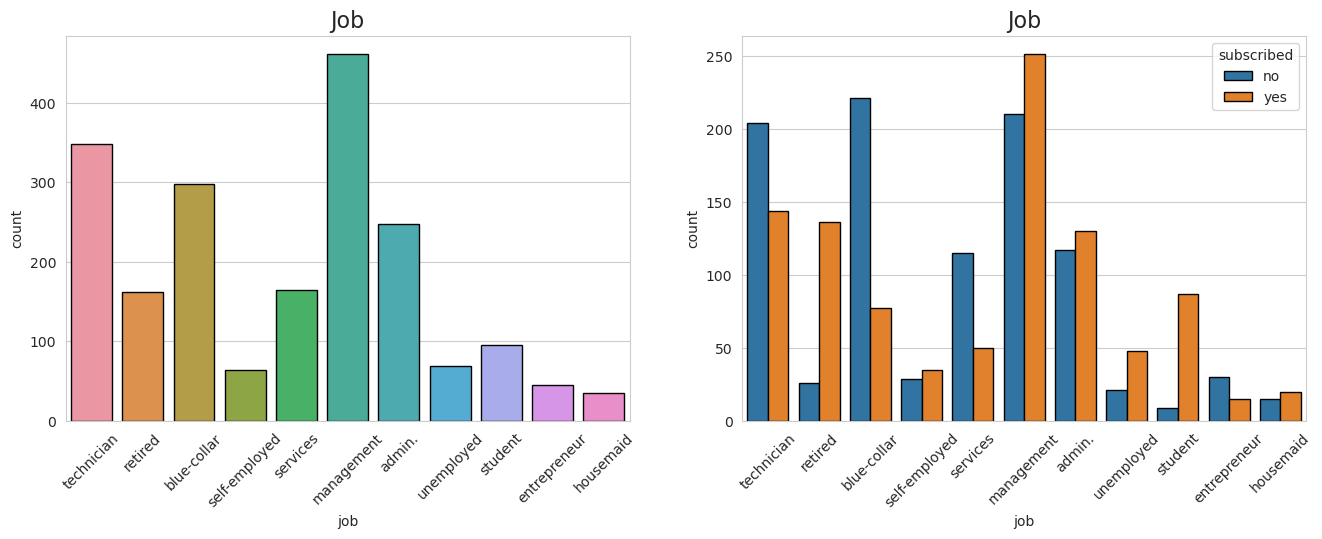

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64


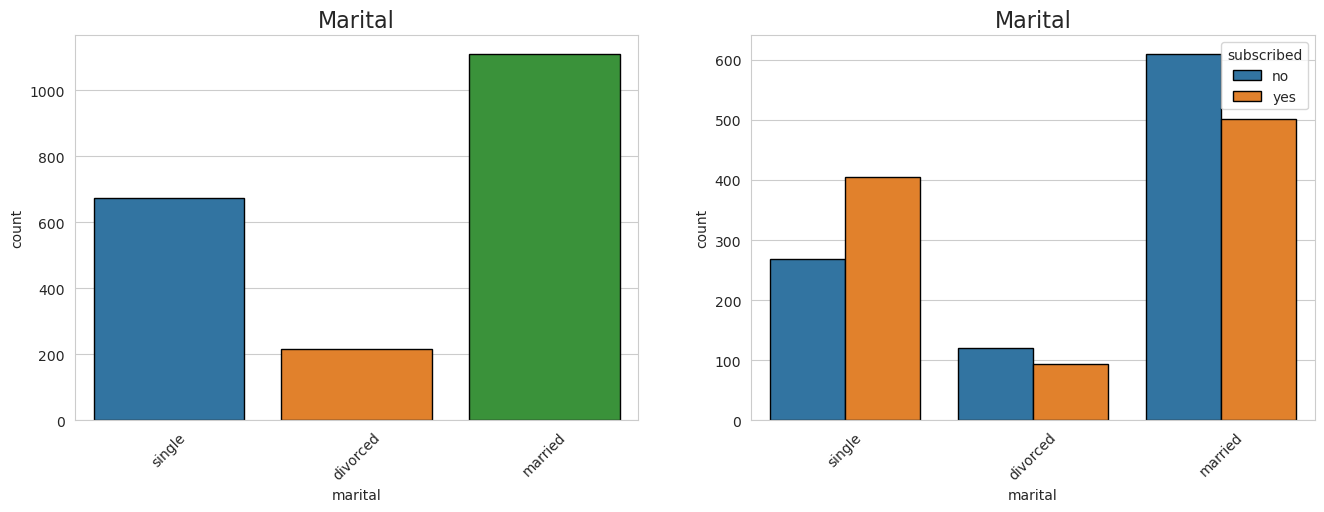

married     1111
single       674
divorced     215
Name: marital, dtype: int64


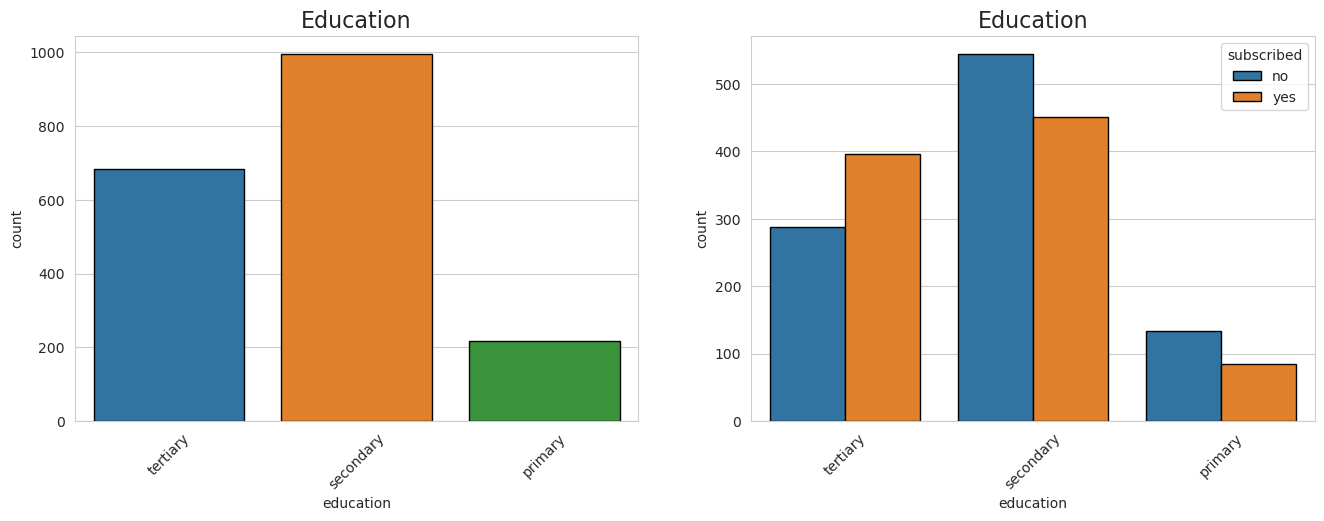

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64


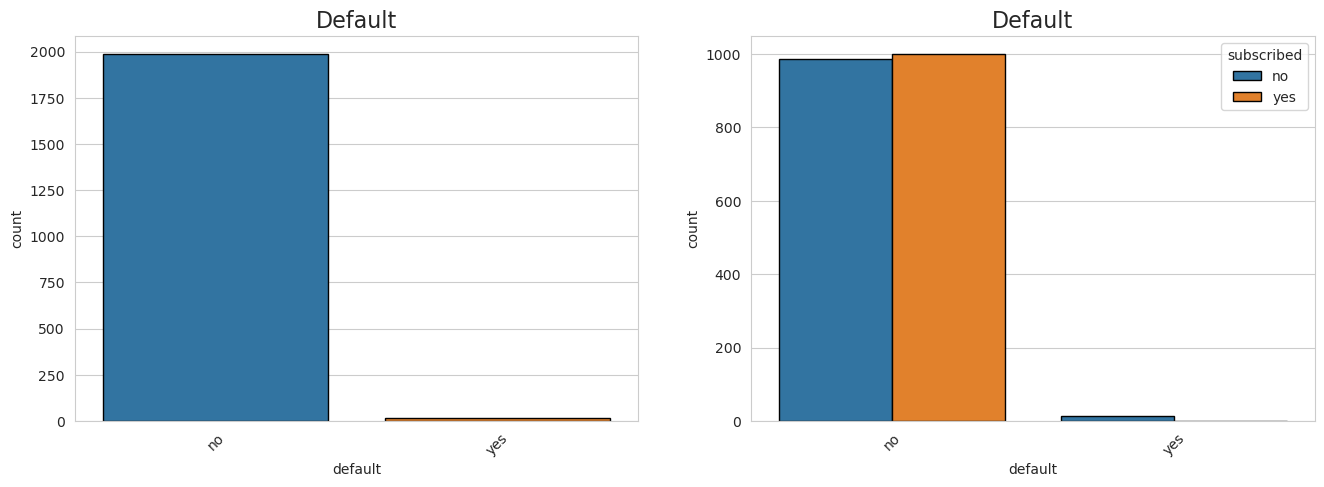

no     1985
yes      15
Name: default, dtype: int64


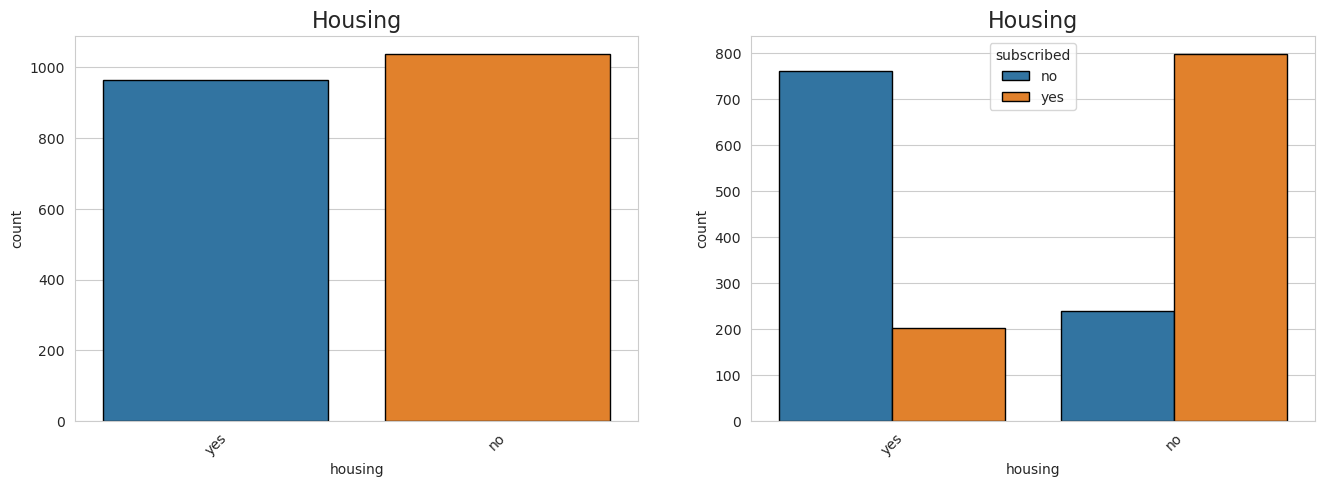

no     1037
yes     963
Name: housing, dtype: int64


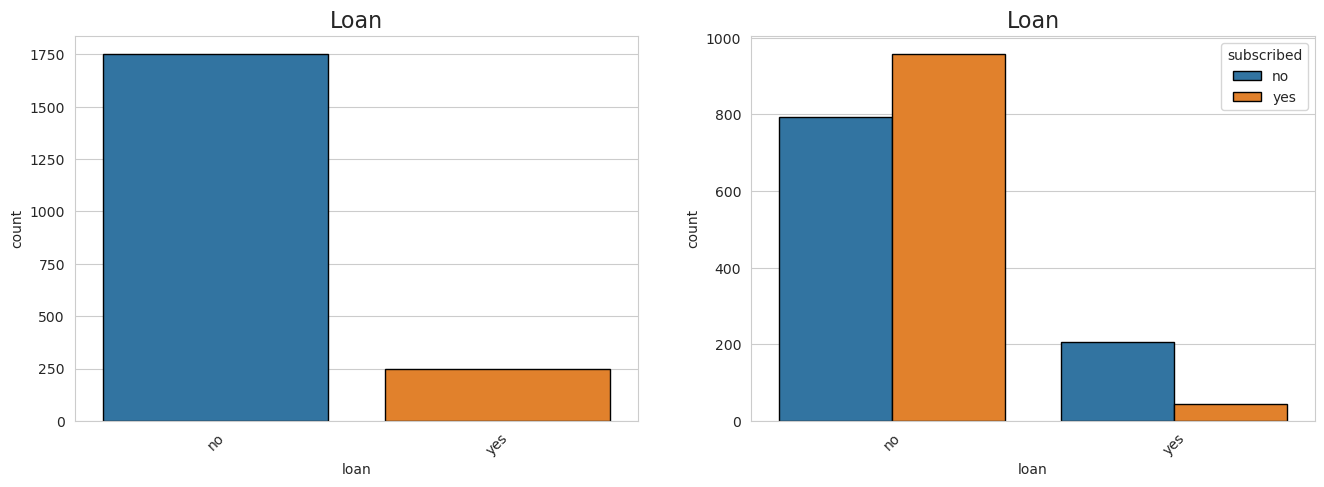

no     1750
yes     250
Name: loan, dtype: int64


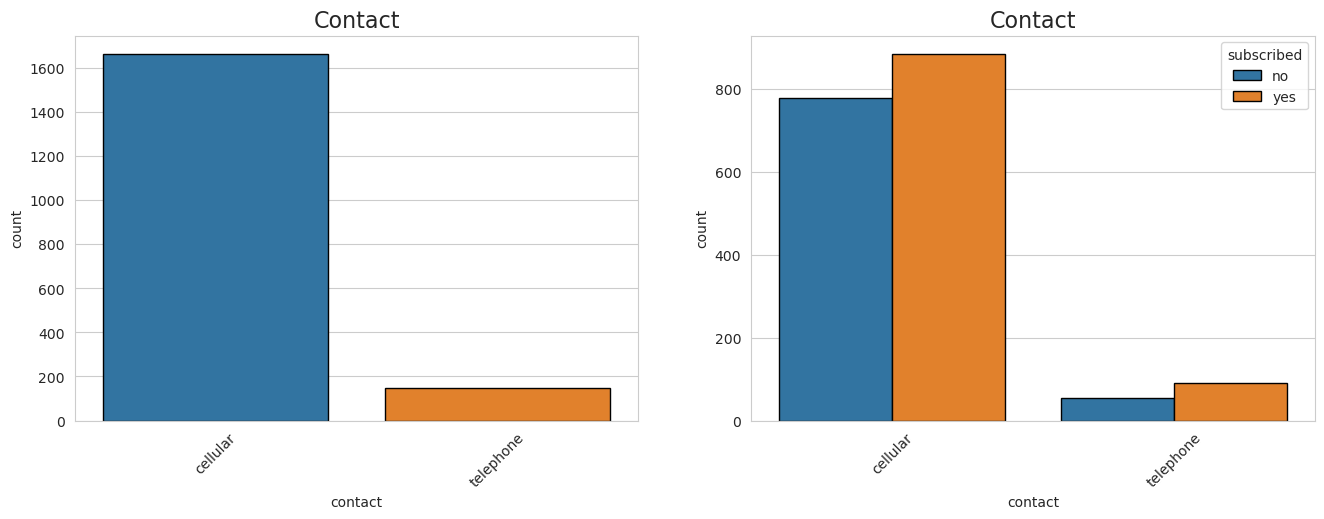

cellular     1663
telephone     146
Name: contact, dtype: int64


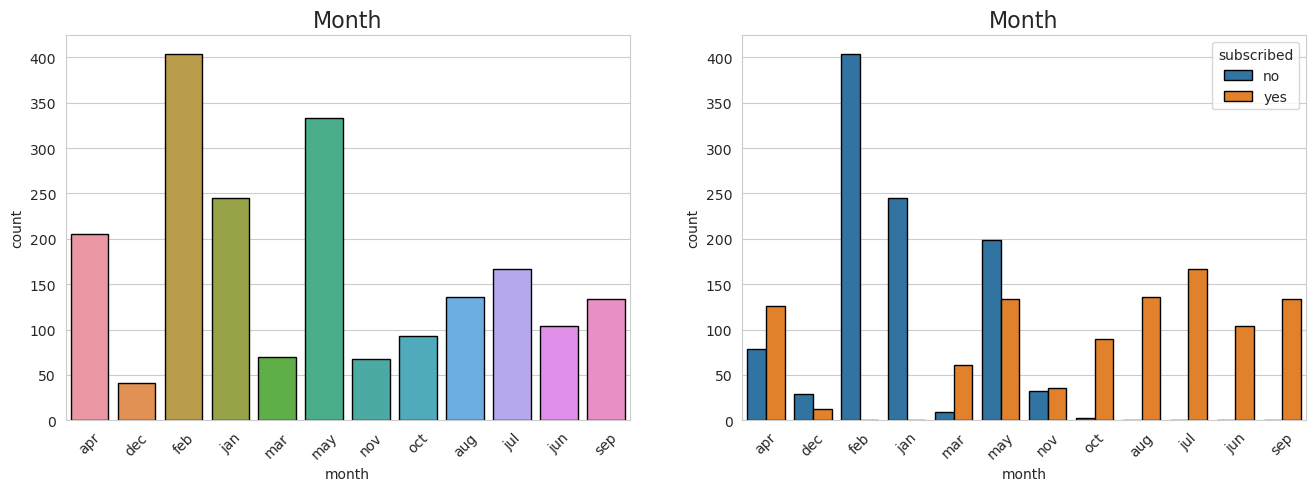

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64


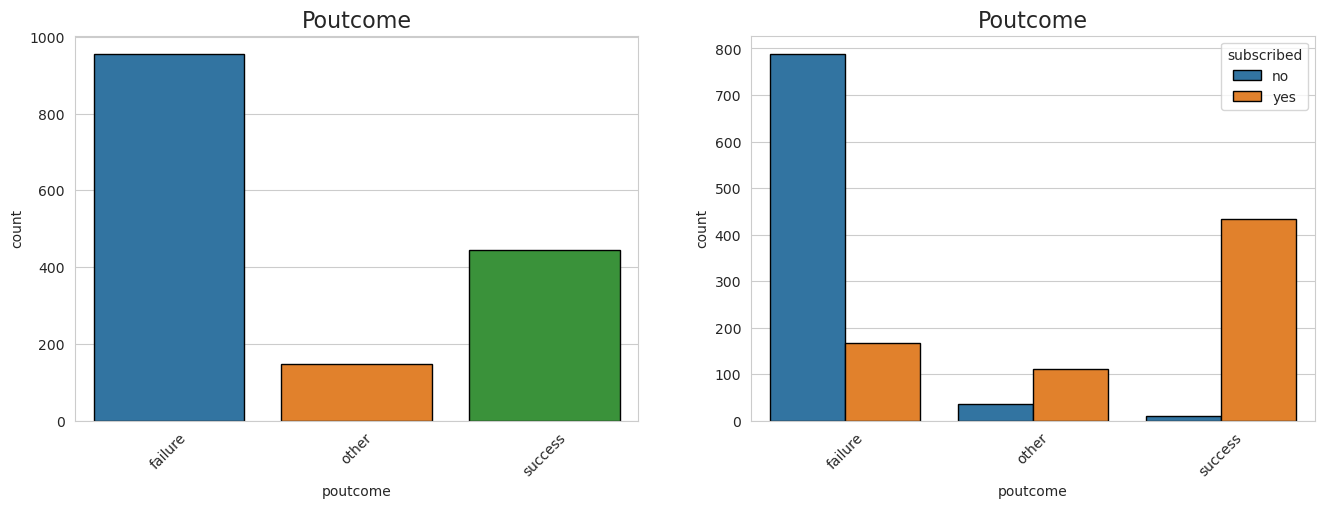

failure    955
success    444
other      147
Name: poutcome, dtype: int64


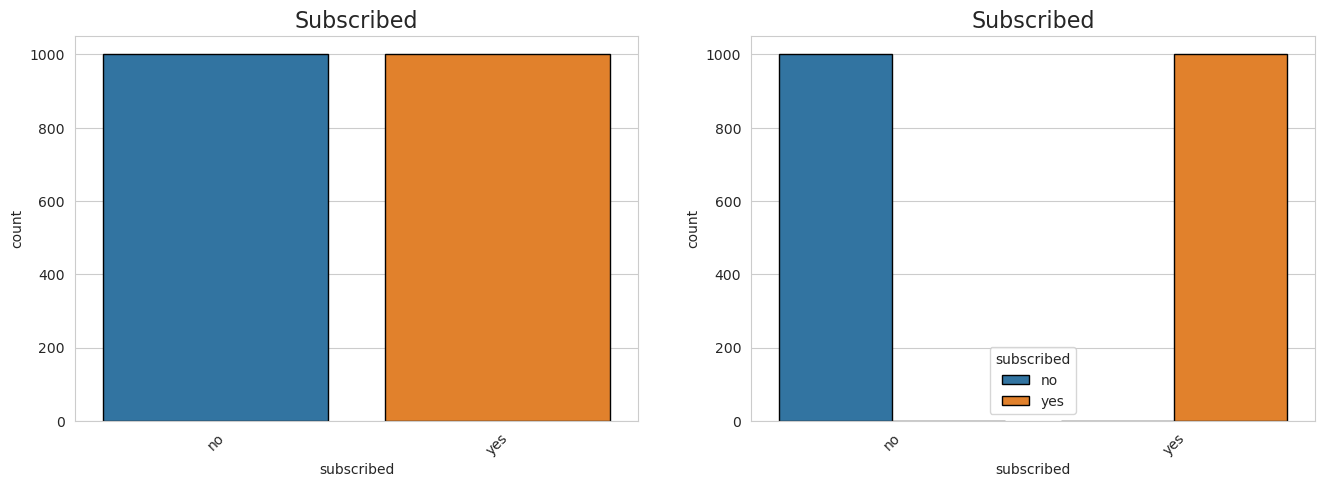

no     1000
yes    1000
Name: subscribed, dtype: int64


In [27]:
for feature in categorical:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=feature, ax=axs[0], edgecolor='black')
    axs[0].set_title(feature.title(), fontsize=16)
    for tick in axs[0].get_xticklabels():
        tick.set_rotation(45)
    
    sns.countplot(data=df, x=feature, hue='subscribed', ax=axs[1], edgecolor='black')
    axs[1].set_title(feature.title(), fontsize=16)
    for tick in axs[1].get_xticklabels():
        tick.set_rotation(45)
    plt.show()
    print(df[feature].value_counts())

**job**

- *management*, *technician*, *blue-collar* and *admin* are the most represented contact job types
- *technician*, *blue-collar*, *services* and *entrepeneur* are the only job titles where more individuals did not subscribe to the campaign compared to the other job types
- The ratios of subscribed to unsubscribed contacts for *student* and *retired* are significantly higher than for other job types. This is interesting, as it seems that individuals in employment were less likely to subscribe than other job types in terms of pure percentage ratios

**marital**

- Married contacts are most numerous for marital status
- The ratio of *married* contacts that subscribed is less than for *single* or *divorced* contacts (married contacts were less likely to subscribe)

**education**

- Contacts with *secondary* education level are the most numerous type of contact
- Contacts with *tertiary* education level were more likely to subscribe for their education type

**default**

- The vast majority of contact for thsi campaign did not have credit in default
- Contacts who didn't have credit in default are represented as subscribing at a rougly 50% rate

**housing**

- Of the contacts for this campaign, there is a rougly 50/50 split between those who have a housing loan and those who don't with slightly more contacts *not* having a housing loan
- Far more contacts who don't have a housing loan subscribed to the campaign that contacts who have got a housing loan

**loan**

- The vast majority of contacts don't have a loan
- Similarly to the `housing` attribute, contacts without a loan were more likely to subscribe than those who had a loan

**contact**

- The vast majority of contacts were contacted by mobile instead of a landline
- The subscription rate doesn't appear to be affected by the contact type

**month**

- Most calls were performed during *February* and *May*
- The subscription rate seemed to be really high towards the end of the campaign, whereas virtually no subscriptions are shown for January or February. This assumes that the campain ran from January to December, though no information is given for when the campaign started

**poutcome**

- Most of the previous campaign outcomes were *failure*
- The subscription rate for contacts with previous campaign successes *(success)* were much higher than for the *failure* and *other* categories

## F. Investigating Questions asked in A

In [28]:
def get_subscription_rate(feature):
    feature_df = df[feature].value_counts().rename('total_contacted_per_categorical_value').reset_index()
    feature_df.set_index('index', inplace=True)
    # Isolate rows for a provided feature where the contact subscribed to the 
    # marketing campaign
    subscribed_for_feature = df[df['subscribed'] == 'yes'][feature].value_counts().rename('total_subscribed_per_categorical_value').reset_index()
    subscribed_for_feature.set_index('index', inplace=True)
    missing_indexes = list(set(feature_df.index).difference(subscribed_for_feature.index))
    if len(missing_indexes) > 0:
        for missing_index in missing_indexes:
            feature_df.loc[missing_index] = 0
            subscribed_for_feature.loc[missing_index] = 0
    merged_df = pd.merge(feature_df, subscribed_for_feature, left_index=True, right_index=True, how='outer')
    merged_df['percentage_per_category_subscribed'] = merged_df['total_subscribed_per_categorical_value'] / merged_df['total_contacted_per_categorical_value'] * 100
    merged_df.sort_values(by='percentage_per_category_subscribed', ascending=False, inplace=True)
    return merged_df

In [29]:
def plot_subscription_rate(df, column):
    df.sort_values(by='total_contacted_per_categorical_value', inplace=True, ascending=True)
    fig, axs = plt.subplots(ncols=2, nrows=1)
    axs[0].barh(df.index,
            df['total_contacted_per_categorical_value'], 
            color='#2f5f8a')
    axs[0].barh(df.index,
            df['total_subscribed_per_categorical_value'], 
            color='#f58236')
    axs[0].set_title(f'Subscribed vs Contacted per {column.title()} type', fontsize=14)
    axs[0].legend(labels=['Total contactacted', 'Total subscribed'], loc='lower right', fontsize=12)
    
    # Drop Nan values with results from diving by zero for the percentage 
    # subscribed values
    df.dropna(inplace=True)
    pie_data = list(df['total_subscribed_per_categorical_value'])
    pie_data = [round(val) for val in pie_data]
    pie_labels = list(df.index)
    axs[1].pie(pie_data, labels=pie_labels, autopct='%.2f')
    axs[1].set_title(f'Percentage subscribed for {column.title()}', fontsize=14)
    plt.gcf().set_size_inches(20, 10)

### F.1. What were the top three and bottom three job types contacted that subscribed to the campaign?

In [30]:
# Isolate subscription rate per job type
subscription_rate_job_df = get_subscription_rate('job')
subscription_rate_job_df

total_contacted_per_categorical_value  \
index                                                  
student                                           96   
retired                                          162   
unemployed                                        69   
housemaid                                         35   
self-employed                                     64   
management                                       461   
admin.                                           247   
technician                                       348   
entrepreneur                                      45   
services                                         165   
blue-collar                                      298   

               total_subscribed_per_categorical_value  \
index                                                   
student                                            87   
retired                                           136   
unemployed                                         48   
housemaid                                          20   
self-employed                                      35   
management                                        251   
admin.                                            130   
technician                                        144   
entrepreneur                                       15   
services                                           50   
blue-collar                                        77   

               percentage_per_category_subscribed  
index                                              
student                                 90.625000  
retired                                 83.950617  
unemployed                              69.565217  
housemaid                               57.142857  
self-employed                           54.687500  
management                              54.446855  
admin.                                  52.631579  
technician                              41.379310  
entrepreneur                            33.333333  
services                                30.303030  
blue-collar                             25.838926

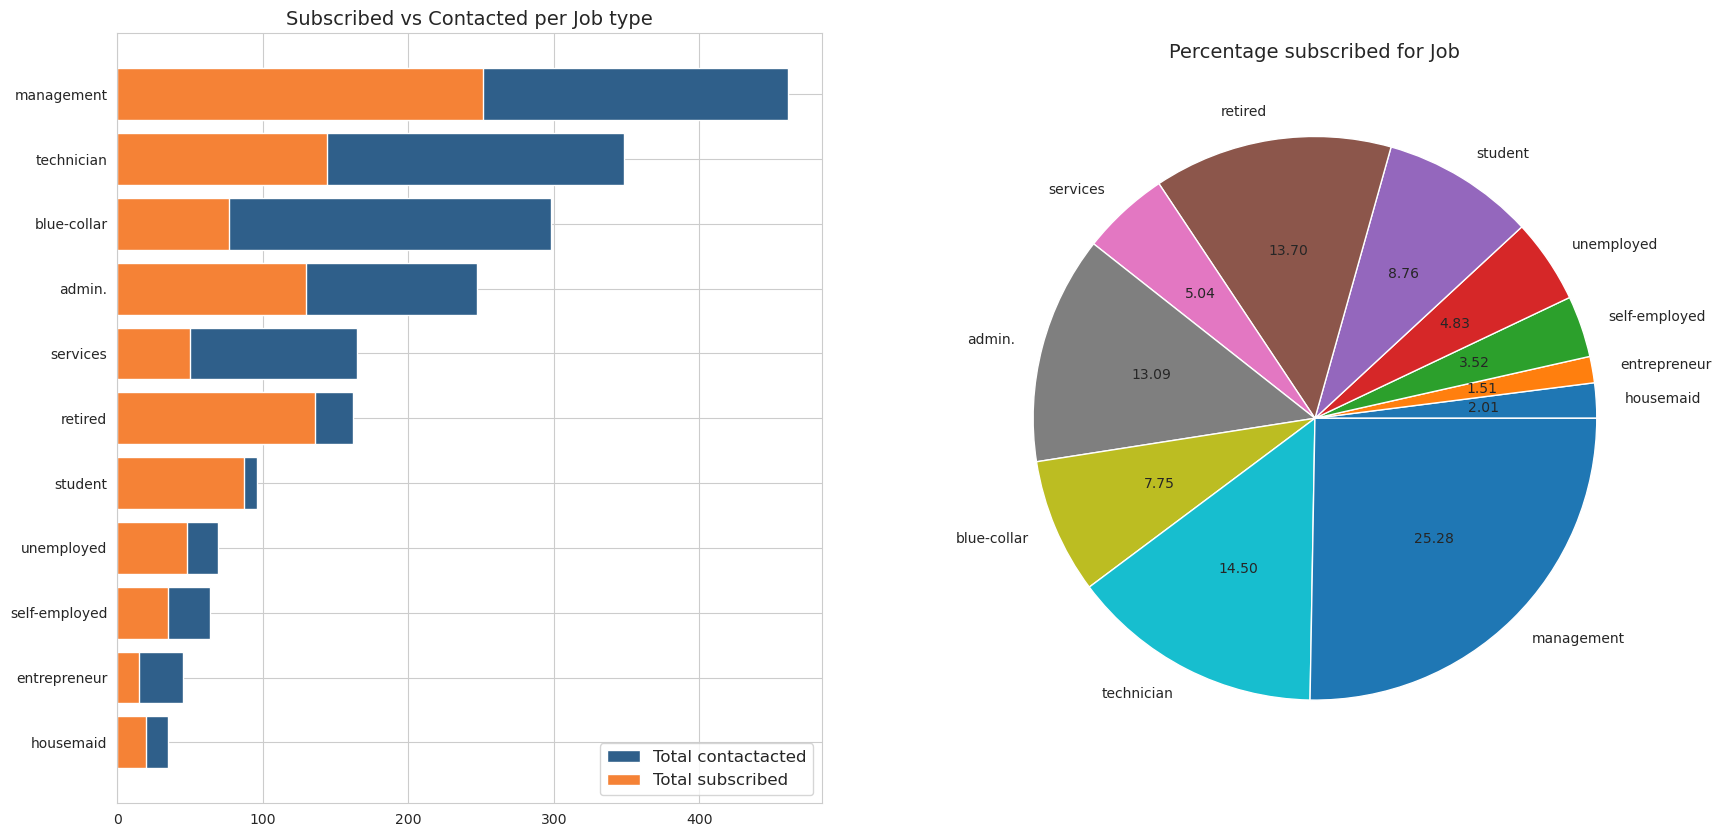

In [31]:
plot_subscription_rate(subscription_rate_job_df, 'job')

In terms of subscription rate (percentage of those contacted who subscribed), the:

- top 3 job categories are *student* (90.63%), *retired* (83.95%) and *unemployed* (69.57%)
- bottom 3 job categories are *blue-collar* (25.84%), *services* (30.30%) and *entrepeneur* (33.33%)

In terms of the greatest number of subscriptions regardless of ratio:

- the top three job categories are *management* (251), *technician* (144) and *retired* (136)
- the bottom three job categories are *entrepeneur* (15), *housemaid* (20) and *self-employed* (35)

The results are surprising. For this limited dataset, it appears that individuals not in permanent employment had the highest subscription rates (student, retired and unemployed), however, these were not the most-contacted job categories.

### F.2. In which months were the highest subscription rates achieved?

In [32]:
# Isolate subscription rate per month
subscription_rate_month_df = get_subscription_rate('month')
subscription_rate_month_df

total_contacted_per_categorical_value  \
index                                          
aug                                      136   
jul                                      167   
jun                                      104   
sep                                      134   
oct                                       93   
mar                                       70   
apr                                      205   
nov                                       68   
may                                      333   
dec                                       41   
feb                                        0   
jan                                        0   

       total_subscribed_per_categorical_value  \
index                                           
aug                                       136   
jul                                       167   
jun                                       104   
sep                                       134   
oct                                        90   
mar                                        61   
apr                                       126   
nov                                        36   
may                                       134   
dec                                        12   
feb                                         0   
jan                                         0   

       percentage_per_category_subscribed  
index                                      
aug                            100.000000  
jul                            100.000000  
jun                            100.000000  
sep                            100.000000  
oct                             96.774194  
mar                             87.142857  
apr                             61.463415  
nov                             52.941176  
may                             40.240240  
dec                             29.268293  
feb                                   NaN  
jan                                   NaN

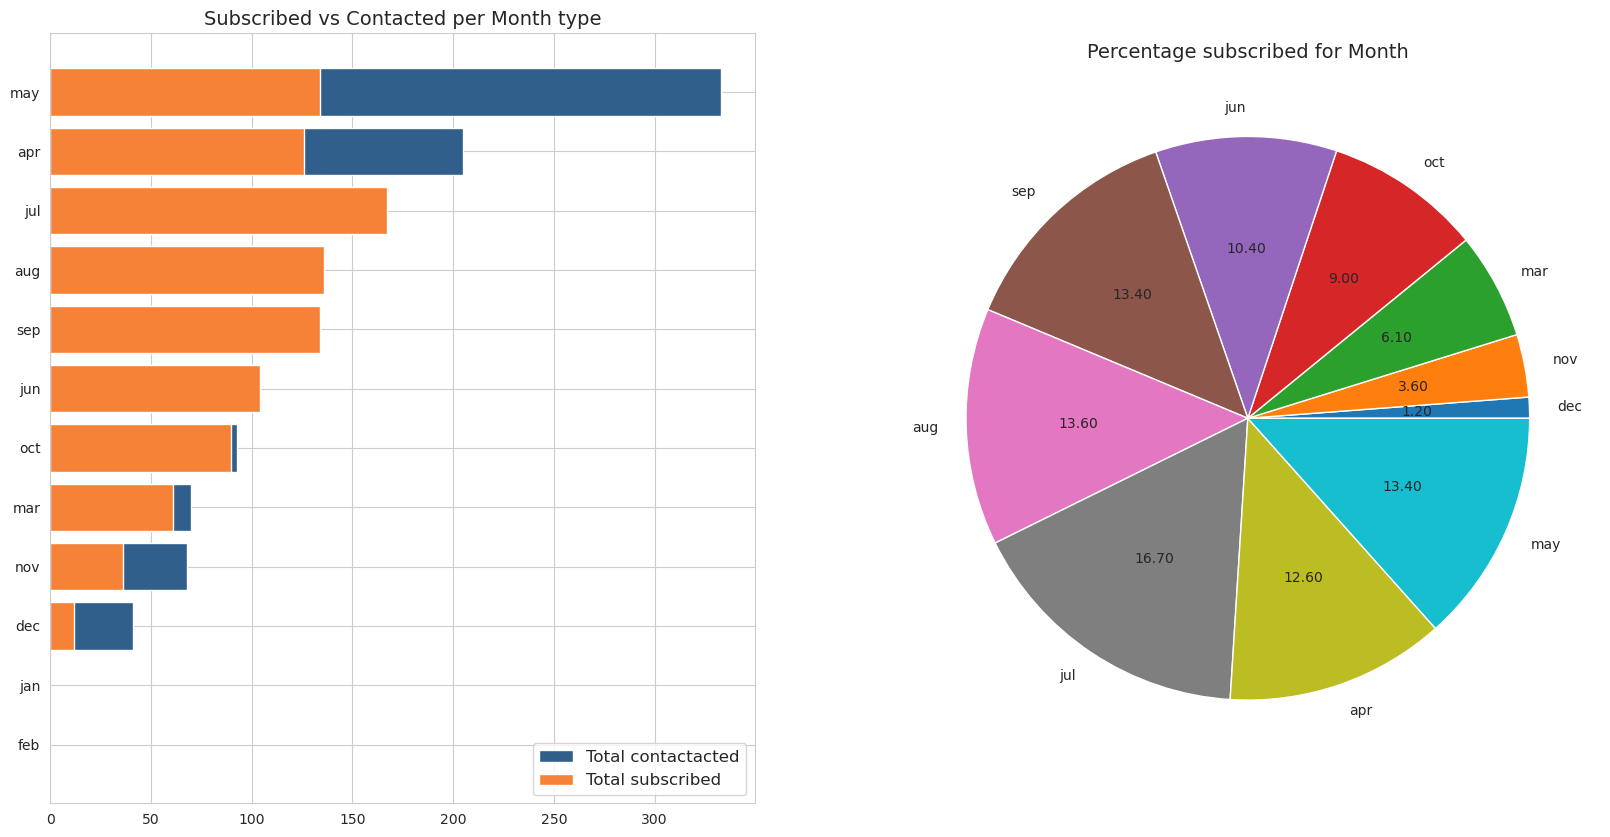

In [33]:
plot_subscription_rate(subscription_rate_month_df, 'month')

According to information on [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) from where the dataset was obtained, the campaign ran from May 2008 to November 2010. Unfortunately, we don't have any values indicating the year from which these values were obtained for this limited dataset. In the absense of this information, it can be observed that the highest subscription rates (percentage of contacted that subscribed) were achieved in June, July, August, September and October with a 100% subscrition rate. October and March were the next highest in terms of subscription rates with 96.77% and 87.14% respectively.

In terms of the actual contact subscribing, April (126) and May (134) had high numbers, though the subscription rates (percentage of contacted that subscribed) were lower than for the highest months with 61.46% and 40.24% respectively.

### F.3. Were contacts who subscribed to previous campaigns more likely to subscribe to the latest one?

In [34]:
# Isolate subscription rate per previous outcome status
subscription_rate_poutcome_df = get_subscription_rate('poutcome')
subscription_rate_poutcome_df

total_contacted_per_categorical_value  \
index                                            
success                                    444   
other                                      147   
failure                                    955   

         total_subscribed_per_categorical_value  \
index                                             
success                                     434   
other                                       111   
failure                                     167   

         percentage_per_category_subscribed  
index                                        
success                           97.747748  
other                             75.510204  
failure                           17.486911

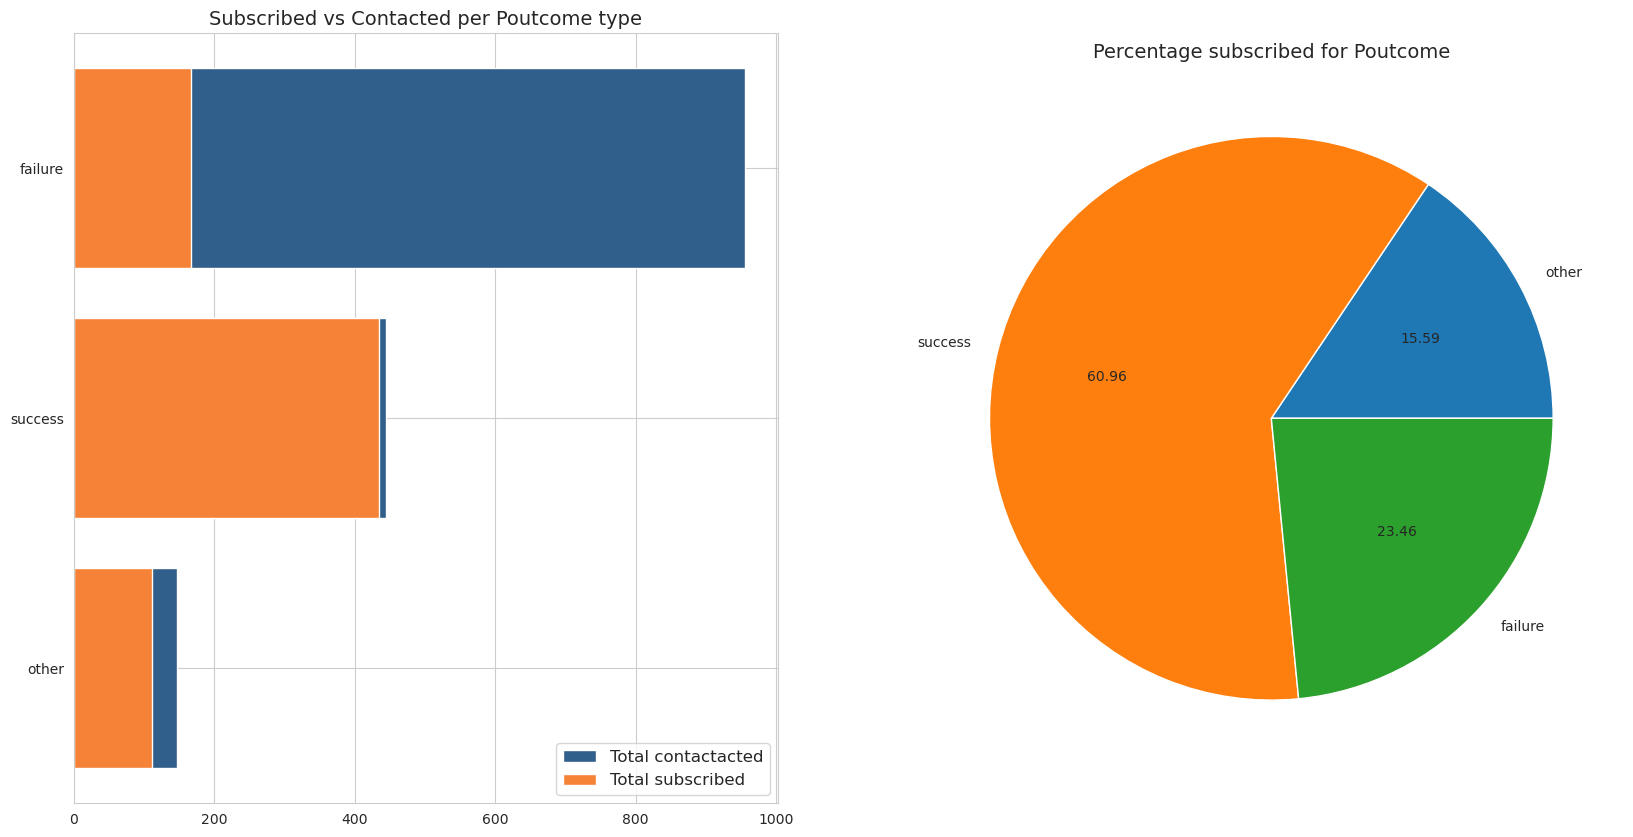

In [35]:
plot_subscription_rate(subscription_rate_poutcome_df, 'poutcome')

The plot above demonstrates that a much higher subscription rate was achieved for contacts with previous campaign successes than for those with previous campaign failures with 97.74% of those with previous sucessful outsome subscribing. In contrast, only 17.29% of those with a previous negative outcome subscribed to this campaign. What exactly the `other` category entails is unkown.

## Reflection

I received some excellent feedback from my peers, ranging from complements on my notebook structure and plotting approach to some improvements which could be made. The latter was appreciated more and included:

- Adding `annot=True` to the correlation plot to show the actual correlation values
- Not removing mossing values when plotting as too many data samples were removed for an accurate representation of the data
- Highlighting where some of my observations were bordering on stating facts which should not be the case for EDA
- Pointing out that I had a duplicate plot which was a bit confusing